# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data


In [95]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [96]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [97]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [98]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, "html.parser")

In [99]:
# Extract all rows of data
table_data = soup.find("tbody")

In [100]:
table_data

<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location


In [101]:
table_elements = []
rows_data = table_data.find_all('tr')


In [102]:
rows_data

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

In [140]:
rows = table_data.select_one('tr').text

In [141]:
rows

'\nid\nterrestrial_date\nsol\nls\nmonth\nmin_temp\npressure\n'

In [142]:
table_headers = []
# Loop through the rows
for x in table_data.find_all('tr'):
    for y in x.find_all('th'):
        table_headers.append(y.text)
table_headers
    

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [152]:
table_data_rows = []
for x in table_data.find_all('tr')[1:]:
    td_tags = x.find_all('td')
    td_values = [y.text for y in td_tags]
    table_data_rows.append(td_values)
table_data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [153]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Confirm DataFrame was created successfully
mars_weather_df = pd.DataFrame(table_data_rows, columns=table_headers)
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [154]:
# Examine data type of each column
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [155]:
# Change data types for data analysis
# Confirm type changes were successful by examining data types again
mars_weather_df.reindex()
mars_weather_df["terrestrial_date"] = pd.to_datetime(mars_weather_df["terrestrial_date"]) 
mars_weather_df["id"] = mars_weather_df["id"].astype(int)
mars_weather_df["month"] = mars_weather_df["month"].astype(int)
mars_weather_df["sol"] = mars_weather_df["sol"].astype(int)
mars_weather_df["ls"] = mars_weather_df["ls"].astype(int)
mars_weather_df["pressure"] = mars_weather_df["pressure"].astype(float)
mars_weather_df["min_temp"] = mars_weather_df["min_temp"].astype(float)
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [156]:
# 1. How many months are there on Mars?
Number_of_Months = mars_weather_df["month"].max()
Number_of_Months

12

In [160]:
# 2. How many Martian days' worth of data are there?
Data_length = mars_weather_df["month"].count()
Data_length

1867

In [169]:
# 3. What is the average low temperature by month?
mars_weather_grouped_df = mars_weather_df.copy().drop(columns=["id", "terrestrial_date", "sol", "ls", "pressure"]).set_index('month')
mars_weather_grouped_df = mars_weather_grouped_df.groupby(["month"]).mean("min_temp")
mars_weather_grouped_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


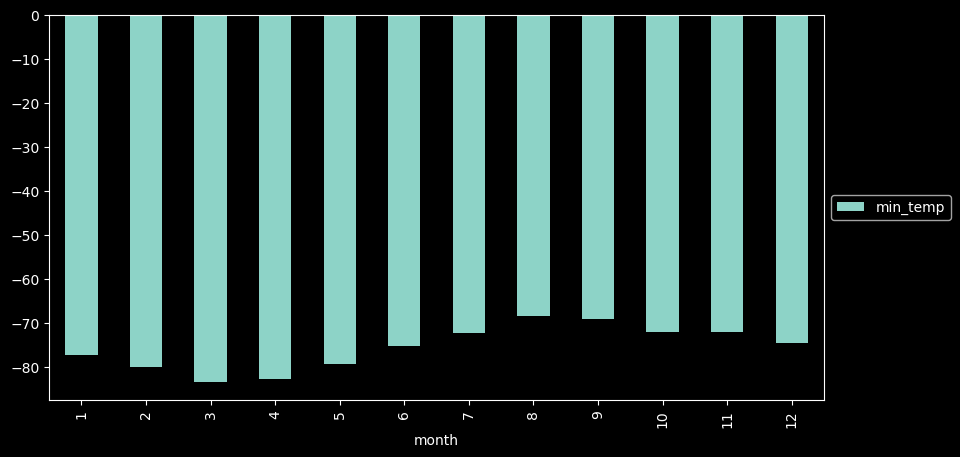

In [195]:
# Plot the average temperature by month
mars_weather_grouped_df
ax1 = mars_weather_grouped_df.plot.bar(stacked=False, figsize=(10, 5))
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

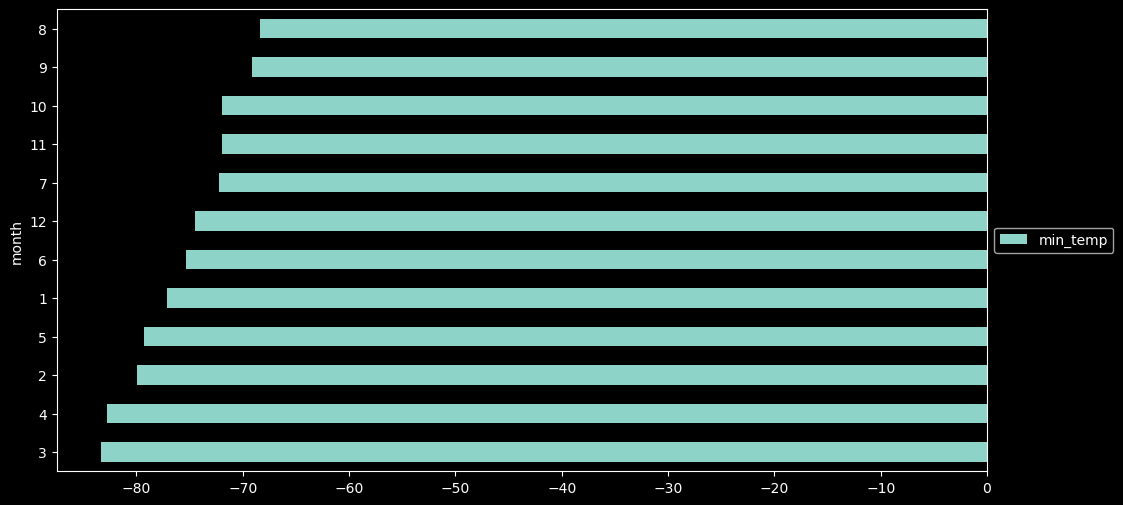

In [196]:
# Identify the coldest and hottest months in Curiosity's location
mars_weather_grouped__sort_df = mars_weather_grouped_df.sort_values(by="min_temp", ascending=True)
ax2 = mars_weather_grouped__sort_df.plot.barh(stacked=False, figsize=(12, 6))
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [197]:
# 4. Average pressure by Martian month
mars_weather_pressure_df = mars_weather_df.copy().drop(columns=["id", "terrestrial_date", "sol", "ls", "min_temp"]).set_index('month')
mars_weather_pressure_df = mars_weather_pressure_df.groupby(["month"]).mean("pressure")
mars_weather_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


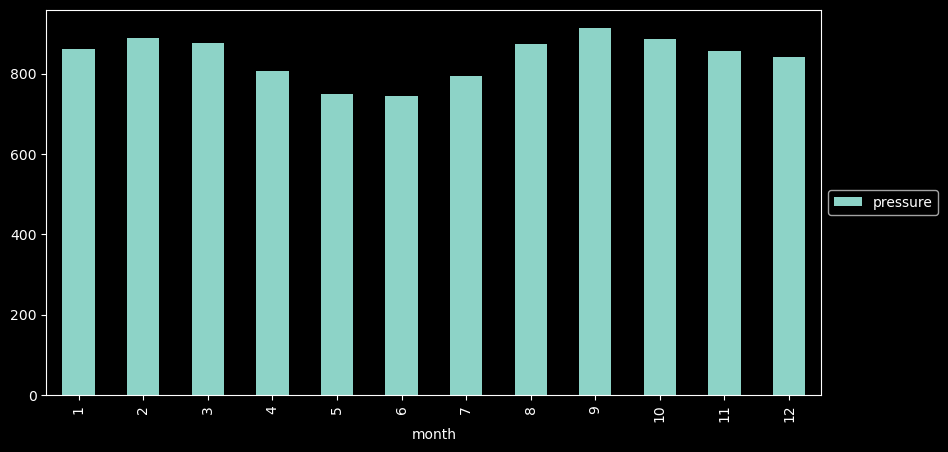

In [198]:
# Plot the average pressure by month
ax3 = mars_weather_pressure_df.plot.bar(stacked=False, figsize=(10, 5))
ax3.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

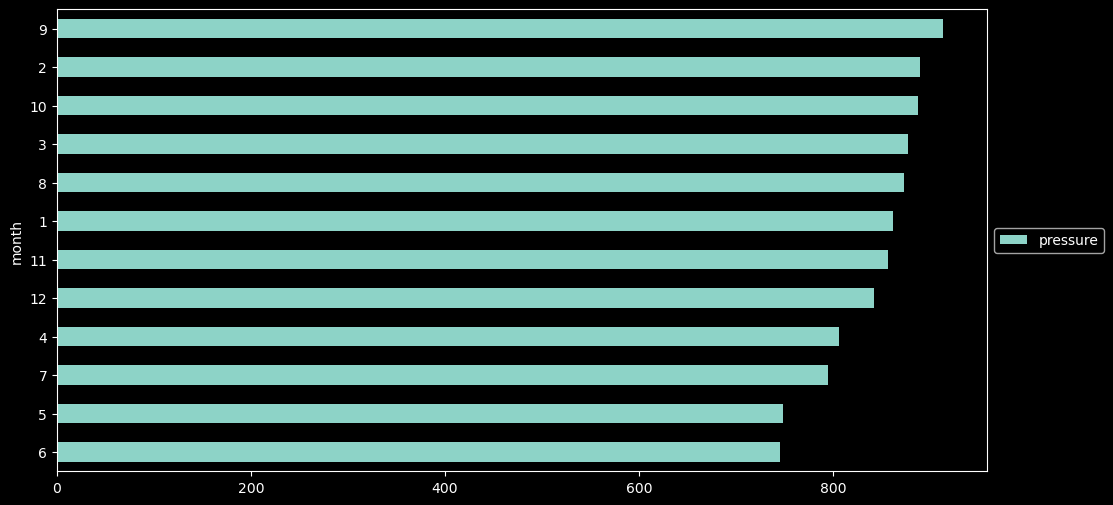

In [200]:
mars_weather_pressure_sort_df = mars_weather_pressure_df.sort_values(by="pressure", ascending=True)
ax4 = mars_weather_pressure_sort_df.plot.barh(stacked=False, figsize=(12, 6))
ax4.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

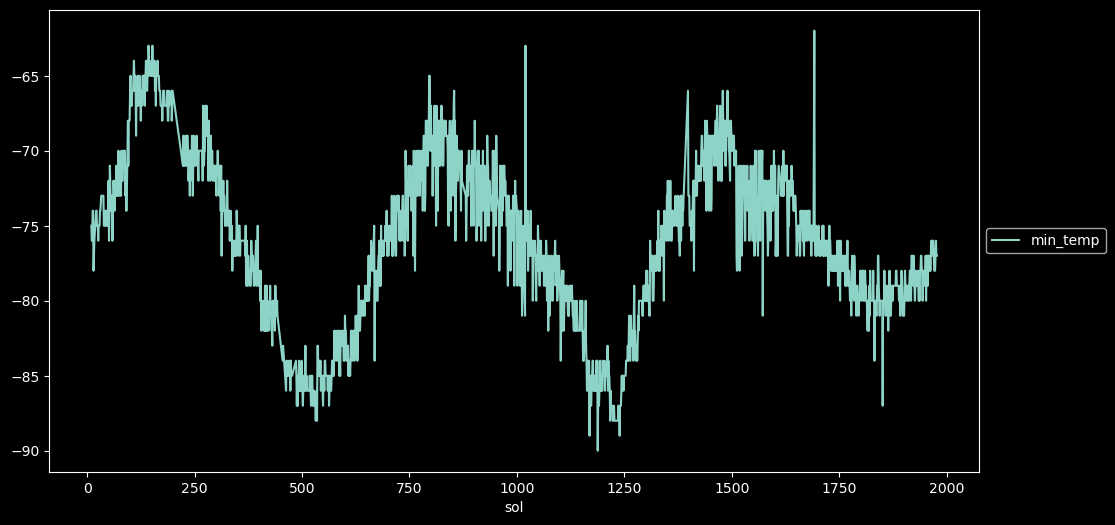

In [201]:
# 5. How many terrestrial (earth) days are there in a Martian year?

mars_weather_days_df = mars_weather_df.copy().drop(columns=["id", "terrestrial_date", "month", "ls", "pressure"]).set_index('sol')
mars_weather_days_df
ax6 = mars_weather_days_df.plot(figsize=(12, 6))
ax6.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [202]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather.csv", index=False, header=True)

In [203]:
browser.quit()